## Introduction
In this project, we have to identify the emotion from the text. 

## Dataset description


## Importing imortant libraries

In [5]:
import pandas as pd
import nltk

## Loading dataset

In [2]:
dataset_path = '../ml/data/ISEAR.csv'
emotion_data = pd.read_csv(dataset_path)

In [43]:
emotion_data.head()

,0,joy,On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.
0,1,fear,Every time I imagine that someone I love or I ...
1,2,anger,When I had been obviously unjustly treated and...
2,3,sadness,When I think about the short time that we live...
3,4,disgust,At a gathering I found myself involuntarily si...
4,5,shame,When I realized that I was directing the feeli...


In [13]:
emotion_data_array = emotion_data.values

In [15]:
emotion_data_array[:, 1]

array(['fear', 'anger', 'sadness', ..., 'disgust', 'shame', 'guilt'],
      dtype=object)

In [16]:
label, sentence_collection = emotion_data_array[:, 1], emotion_data_array[:, 2]

In [76]:
label

array(['fear', 'anger', 'sadness', ..., 'disgust', 'shame', 'guilt'],
      dtype=object)

### Tokenization

In [22]:
whitespace_tokenizer = nltk.tokenize.WhitespaceTokenizer()
treebank_tokenizer = nltk.tokenize.TreebankWordTokenizer()

In [23]:
whitespace_tokenized_sentences = []
for sentence in sentence_collection:
    whitespace_tokenized_sentences.append(
                                    whitespace_tokenizer.tokenize(sentence)
                                    )

In [25]:
treebank_tokenized_sentences = []
for sentence in sentence_collection:
    treebank_tokenized_sentences.append(treebank_tokenizer.tokenize(sentence))

In [26]:
treebank_tokenized_sentences

[['Every',
  'time',
  'I',
  'imagine',
  'that',
  'someone',
  'I',
  'love',
  'or',
  'I',
  'could',
  'contact',
  'a',
  'serious',
  'illness',
  ',',
  'even',
  'death',
  '.'],
 ['When',
  'I',
  'had',
  'been',
  'obviously',
  'unjustly',
  'treated',
  'and',
  'had',
  'no',
  'possibility',
  'of',
  'elucidating',
  'this',
  '.'],
 ['When',
  'I',
  'think',
  'about',
  'the',
  'short',
  'time',
  'that',
  'we',
  'live',
  'and',
  'relate',
  'it',
  'to',
  'the',
  'periods',
  'of',
  'my',
  'life',
  'when',
  'I',
  'think',
  'that',
  'I',
  'did',
  'not',
  'use',
  'this',
  'short',
  'time',
  '.'],
 ['At',
  'a',
  'gathering',
  'I',
  'found',
  'myself',
  'involuntarily',
  'sitting',
  'next',
  'to',
  'two',
  'people',
  'who',
  'expressed',
  'opinions',
  'that',
  'I',
  'considered',
  'very',
  'low',
  'and',
  'discriminating',
  '.'],
 ['When',
  'I',
  'realized',
  'that',
  'I',
  'was',
  'directing',
  'the',
  'feelings',
 

### Token normalization

In [27]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [28]:
lemmatized_sentences = []
for sentence in treebank_tokenized_sentences:
    lemmatized_sentences.append(" ".join(lemmatizer.lemmatize(token) for token in sentence))

In [29]:
lemmatized_sentences

['Every time I imagine that someone I love or I could contact a serious illness , even death .',
 'When I had been obviously unjustly treated and had no possibility of elucidating this .',
 'When I think about the short time that we live and relate it to the period of my life when I think that I did not use this short time .',
 'At a gathering I found myself involuntarily sitting next to two people who expressed opinion that I considered very low and discriminating .',
 'When I realized that I wa directing the feeling of discontent with myself at my partner and this way wa trying to put the blame on him instead of sorting out my own feeliings .',
 'I feel guilty when when I realize that I consider material thing more important than caring for my relatives. I feel very self-centered .',
 "After my girlfriend had taken her exam we went to her parent 's place .",
 'When , for the first time I realized the meaning of death .',
 'When a car is overtaking another and I am forced to drive off

In [63]:
from nltk.corpus import stopwords
from string import punctuation

StopWords = set(stopwords.words('english'))

preprocessed_sentences = []
for sentence in lemmatized_sentences:
    tem_sentence = ""
    for word in sentence.split(" "):
        if word in punctuation:
            pass
        elif word not in StopWords:
            tem_sentence += word + " "
    preprocessed_sentences.append(tem_sentence.strip())

In [64]:
preprocessed_sentences

['Every time I imagine someone I love I could contact serious illness even death',
 'When I obviously unjustly treated possibility elucidating',
 'When I think short time live relate period life I think I use short time',
 'At gathering I found involuntarily sitting next two people expressed opinion I considered low discriminating',
 'When I realized I wa directing feeling discontent partner way wa trying put blame instead sorting feeliings',
 'I feel guilty I realize I consider material thing important caring relatives. I feel self-centered',
 "After girlfriend taken exam went parent 's place",
 'When first time I realized meaning death',
 'When car overtaking another I forced drive road',
 'When I recently thought hard work take study one want try something else. When I read theoretical book English I understand',
 'When I found bristle liver paste tube',
 'When I wa tired unmotivated I shouted girlfriend brought negative side character actually important',
 'When I think I study eno

In [70]:
import numpy as np

X_data = np.array(preprocessed_sentences)

In [75]:
X_data

array(['Every time I imagine someone I love I could contact serious illness even death',
       'When I obviously unjustly treated possibility elucidating',
       'When I think short time live relate period life I think I use short time',
       ...,
       "A day back I wa waiting bus bus stop. Before getting bus I prepared exact amount coin pay bus fair I got bus I put coin box meant collect bus fair. I thought I paid wanted get inside. However bus driver called asked impolite way coin stuck opening box. He seen paying wa n't stack coin box. I could understand driver kept questioning me. He made feel angry last inserted dollar coin box get away him. Later I found I forgotten coin pocket paid enough fair first time. After I entered bus I could still hear scolding I felt disgusted",
       'A day back I tutorial class teacher randomly assigned one person group make presentation. The discussion group confused presentation wa well prepared. Unfortunately I wa selected present I could ke

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, label, test_size=0.2)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [83]:
naive_bayes_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [84]:
naive_bayes_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [85]:
test_label = naive_bayes_model.predict(X_test)

Text(91.68, 0.5, 'predicted label')

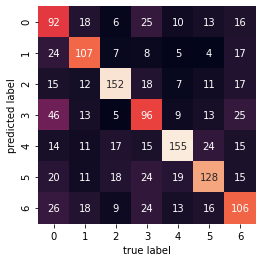

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, test_label)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [90]:
from sklearn import metrics

print(metrics.classification_report(y_test, test_label, digits=3))

              precision    recall  f1-score   support

       anger      0.511     0.388     0.441       237
     disgust      0.622     0.563     0.591       190
        fear      0.655     0.710     0.682       214
       guilt      0.464     0.457     0.460       210
         joy      0.618     0.711     0.661       218
     sadness      0.545     0.612     0.577       209
       shame      0.500     0.502     0.501       211

    accuracy                          0.561      1489
   macro avg      0.559     0.564     0.559      1489
weighted avg      0.558     0.561     0.557      1489

